In [231]:

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

# —-------
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     bc = load_breast_cancer()
     X_main, y_main = bc.data, bc.target


# 1.Explore and import Breast Cancer Wisconsin dataset:
# a)Explore the dataset by using the Scikit Learn library and Numpy
scaler = StandardScaler()
X_main = scaler.fit_transform(X_main)
print(f"The shaepe of x before column of 1: {X_main.shape}")
#Add columns of 1 to account for bias, and then you will only need the theta
X_b = np.c_[np.ones((X_main.shape[0], 1)), X_main]

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_b, y_main, test_size=0.3, random_state=42)
print (X_train.shape)
print (X_test.shape)
print(y_train.shape)
print(y_test.shape)
     

The shaepe of x before column of 1: (569, 30)
(398, 31)
(171, 31)
(398,)
(171,)


In [232]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function (y, y_dash):
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss
     

In [233]:
def cost_func(y, y_dash):
    m = len(y)
    return np.sum(loss_function(y, y_dash)) / m

In [234]:
def gradient_descent (x_1, y_1, lr,iterations):
    m, n= x_1.shape
    cost_every100=[]
    y_1 = y_1.reshape(-1, 1)
    # Initialize weights and bias to zeros
    weights = np.zeros((n, 1))
    #bias = 0
    # Store loss history to visualize convergence
    loss_history = []
    for i in range(iterations):
        # Forward propagation
        z = np.dot(x_1, weights) 
        #print(f"The shpae of z is: {z.shape}")
        y_hat = sigmoid(z)
        #print(f"The shpae of y_hat is: {y_hat.shape}")
        # Compute cost/loss
        loss = loss_function(y_1, y_hat)
        loss_history.append(loss)
        cost_val = cost_func(y_1,y_hat)
        if i % 100 == 0:
            cost_every100.append(cost_val)
            # print(f"Iteration {i}:")
            # print(f"First 10 sigmoid inputs (z): {z[:10]}")
            # print(f"First 10 sigmoid outputs (y_hat): {y_hat[:10]}")
            # print(f"First 10 weights: {weights[:10]}")
        # Backward propagation (gradient calculation)
        gradients = (1/m) * np.dot(x_1.T, (y_hat - y_1))
        #print(f"gradients shape: {gradients.shape}")
        # Update parameters 
        weights =weights - lr * gradients
        #print(f"Weights shape after iteration {i}: {weights.shape}")
        #print(weights)
        #print("next")
    return weights, loss_history, cost_every100


In [235]:
def predict(X, w):
    z = np.dot(X, w)
    A = sigmoid(z)
    return (A >= 0.5).astype(int)



In [236]:
# 3.The initial hyper-parameters for this assignment are:
# a)Threshold=0.5
# b)Learning rate=0.5
# c)Run your algorithm for 5000 iterations to update weights
lr1=0.5
iterations1=5000
w_result, loss_result,cost_values3 = gradient_descent (X_train, y_train, lr1,iterations1)

In [237]:
binary_predictions = predict(X_test,w_result)
binary_predictions = binary_predictions[:, 0]  # Take the first column
cost_values3 = np.array(cost_values3)
print (cost_values3.shape)
x_values = np.arange(0, iterations1, 100)
print(len(x_values))

(50,)
50


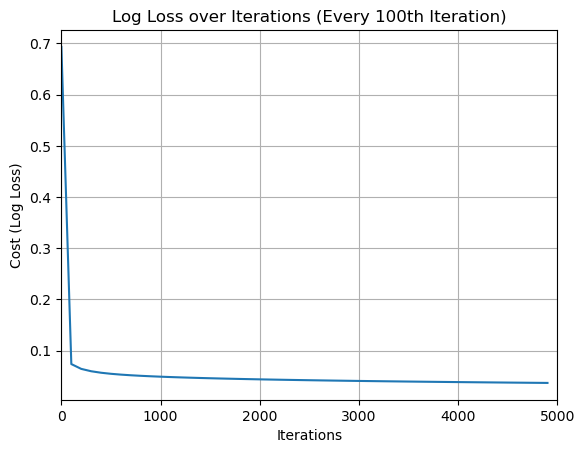

In [238]:
# 6.Plot the log loss on every 100th iteration of your gradient descent, 
# with the iterationnumber on the horizontal axis and the objective value on the vertical axis
#x_values = np.arange(0, iterations1, 50)

# Plot cost_values3 against x_values
plt.plot(x_values, cost_values3)
plt.xlim([0, iterations1])  # Set x-axis limits to match the number of iterations
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.title("Log Loss over Iterations (Every 100th Iteration)")
plt.grid(True)
plt.show()

In [239]:
# 4.Report the coefficient vector w
print ("The coefficient vector w was : ", w_result)

# 5.For the test dataset, determine the
# a)Precision
# b)Recall
# c)F1 score
# d)Confusion matrix..
# Evaluate the model - Make sure the correct variables are passed 

#print(y_test)
#print("Next")
#print(binary_predictions)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

The coefficient vector w was :  [[-0.4076448 ]
 [ 0.06932229]
 [ 0.06765333]
 [ 0.26700001]
 [-0.20721659]
 [-0.31525128]
 [ 2.91414991]
 [-1.51444121]
 [-3.13995413]
 [ 1.24420456]
 [-0.77052515]
 [-3.60778731]
 [ 0.61394238]
 [-0.71373587]
 [-2.5056965 ]
 [-0.31138202]
 [ 0.42979085]
 [ 0.31716379]
 [-1.5155607 ]
 [ 1.24326829]
 [ 1.98287601]
 [-1.61472778]
 [-2.94637798]
 [-0.29961328]
 [-1.6873979 ]
 [-0.177677  ]
 [ 0.75740683]
 [-2.4799916 ]
 [-1.4740527 ]
 [-3.01217857]
 [-0.28367323]]
Precision: 0.9905660377358491
Recall: 0.9722222222222222
F1 Score: 0.9813084112149533
Accuracy: 0.9766081871345029
Confusion Matrix:
[[ 62   1]
 [  3 105]]


In [240]:
# 6.Plot the log loss on every 100th iteration of your gradient descent, 
# with the iterationnumber on the horizontal axis and the objective value on the vertical axis
# Plot the log loss over iterations
#plt.plot(range(0, iterations, 100), log_losses)
#plt.xlabel("Iterations")
#plt.ylabel("Log Loss")
#plt.title("Log Loss over Iterations")
#plt.show()  

In [241]:
#7.Use the test set as a validation set and see if you can find a better setting of thehyperparameters. Report the best values you found.
w_result1, loss_result1,cost_val4 = gradient_descent (X_test, y_test, lr1,iterations1)
binary_predictions1 = predict(X_train,w_result1)
binary_predictions1 = binary_predictions1[:, 0]  # Take the first column
print ("The coefficient vector w was : ", w_result1)

precision1 = precision_score(y_train, binary_predictions1)
recall1 = recall_score(y_train, binary_predictions1)
f11 = f1_score(y_train, binary_predictions1)
accuracy1 = accuracy_score(y_train, binary_predictions1)
conf_matrix1 = confusion_matrix(y_train, binary_predictions1)

print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f11}")
print(f"Accuracy: {accuracy1}")
print(f"Confusion Matrix:\n{conf_matrix1}")



The coefficient vector w was :  [[-0.48854476]
 [-1.52023326]
 [-1.20617112]
 [-1.67230263]
 [-1.50851183]
 [ 0.42849251]
 [-0.59890235]
 [-1.73085068]
 [-0.3112717 ]
 [-1.24426353]
 [ 2.05406238]
 [-1.8973661 ]
 [-0.12850737]
 [-1.71545734]
 [-1.86720591]
 [-1.58591614]
 [ 2.15931343]
 [ 0.89614041]
 [ 0.53257046]
 [-0.46925412]
 [ 2.16119419]
 [-3.22082624]
 [-0.41390872]
 [-3.42565183]
 [-2.92832538]
 [-3.01939073]
 [-0.94642206]
 [-0.84143795]
 [-1.21088756]
 [ 1.47297972]
 [-3.43839858]]
Precision: 0.9678714859437751
Recall: 0.9678714859437751
F1 Score: 0.9678714859437751
Accuracy: 0.9597989949748744
Confusion Matrix:
[[141   8]
 [  8 241]]


In [242]:
# Define hyperparameter ranges
learning_rates = [0.01, 0.1, 0.5]  # Different learning rates to test
iterations_list = [1000, 5000, 10000]  # Different iteration counts to test

# Variables to store the best hyperparameters and their performance
best_lr = None
best_iterations = None
best_accuracy = 0

# Loop over all combinations of learning rates and iterations
for lr in learning_rates:
    for iterations in iterations_list:
        # Train the model on the training set
        w_result, loss_result, cost_values = gradient_descent(X_train, y_train, lr, iterations)
        # Predict on the test set =
        binary_predictions = predict(X_test, w_result)
        binary_predictions = binary_predictions[:, 0]  # Take first column if multilabel
        accuracy = accuracy_score(y_test, binary_predictions)
        # If this is the best performance so far, store these hyperparameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_iterations = iterations
        print(f"Learning Rate: {lr}, Iterations: {iterations}, Accuracy: {accuracy}")

# Report the best hyperparameters
print(f"Best Learning Rate: {best_lr}, Best Iterations: {best_iterations}, Best Accuracy: {best_accuracy}")


Learning Rate: 0.01, Iterations: 1000, Accuracy: 0.9883040935672515
Learning Rate: 0.01, Iterations: 5000, Accuracy: 0.9883040935672515
Learning Rate: 0.01, Iterations: 10000, Accuracy: 0.9941520467836257
Learning Rate: 0.1, Iterations: 1000, Accuracy: 0.9941520467836257
Learning Rate: 0.1, Iterations: 5000, Accuracy: 0.9824561403508771
Learning Rate: 0.1, Iterations: 10000, Accuracy: 0.9824561403508771
Learning Rate: 0.5, Iterations: 1000, Accuracy: 0.9824561403508771
Learning Rate: 0.5, Iterations: 5000, Accuracy: 0.9766081871345029
Learning Rate: 0.5, Iterations: 10000, Accuracy: 0.9766081871345029
Best Learning Rate: 0.01, Best Iterations: 10000, Best Accuracy: 0.9941520467836257
